In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv("./KDDTrain+.csv")

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
df.isnull().sum()

duration                        0
protocol_type                   0
 service                        0
 flag                           0
 src_bytes                      0
 dst_bytes                      0
 land                           0
 wrong_fragment                 0
 urgent                         0
 hot                            0
 num_failed_logins              0
 logged_in                      0
 num_compromised                0
  root_shell                    0
  su_attempted                  0
  num_root                      0
  num_file_creations            0
  num_shells                    0
 num_access_files               0
 num_outbound_cmds              0
 is_host_login                  0
 is_guest_login                 0
 count                          0
 srv_count                      0
 serror_rate                    0
 srv_serror_rate                0
 rerror_rate                    0
 srv_rerror_rate                0
 same_srv_rate                  0
 diff_srv_rate

In [ ]:
df.duplicated().sum()

9

In [ ]:
df[df.duplicated()]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
26923,0,icmp,eco_i,SF,8,0,0,0,0,0,...,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,anomaly
34008,0,icmp,eco_i,SF,8,0,0,0,0,0,...,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,anomaly
79815,0,icmp,eco_i,SF,8,0,0,0,0,0,...,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,anomaly
79859,0,icmp,ecr_i,SF,8,0,0,0,0,0,...,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,anomaly
106599,0,icmp,ecr_i,SF,8,0,0,0,0,0,...,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,anomaly
113236,0,icmp,ecr_i,SF,8,0,0,0,0,0,...,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,anomaly
120163,0,icmp,ecr_i,SF,8,0,0,0,0,0,...,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,anomaly
120273,0,icmp,ecr_i,SF,8,0,0,0,0,0,...,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,anomaly
123791,0,icmp,eco_i,SF,8,0,0,0,0,0,...,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,anomaly


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(125964, 42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125964 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      125964 non-null  int64  
 1   protocol_type                 125964 non-null  object 
 2    service                      125964 non-null  object 
 3    flag                         125964 non-null  object 
 4    src_bytes                    125964 non-null  int64  
 5    dst_bytes                    125964 non-null  int64  
 6    land                         125964 non-null  int64  
 7    wrong_fragment               125964 non-null  int64  
 8    urgent                       125964 non-null  int64  
 9    hot                          125964 non-null  int64  
 10   num_failed_logins            125964 non-null  int64  
 11   logged_in                    125964 non-null  int64  
 12   num_compromised              125964 non-nul

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125964.000000,1.259640e+05,1.259640e+05,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,...,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000,125964.000000
mean,287.165166,4.557000e+04,1.978053e+04,0.000198,0.022689,0.000111,0.204423,0.001223,0.395764,0.279270,...,182.161816,115.661125,0.521207,0.082957,0.148318,0.032545,0.284473,0.278504,0.118840,0.120248
std,2604.607223,5.870541e+06,4.021413e+06,0.014087,0.253539,0.014367,2.150045,0.045241,0.489016,23.942897,...,99.198069,110.702526,0.448947,0.188927,0.308924,0.112567,0.444793,0.445679,0.306567,0.319469
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


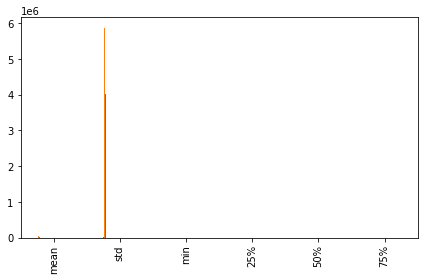

In [ ]:
df.describe().iloc[1:-1, :].plot.bar(legend=False)
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel=' class '>

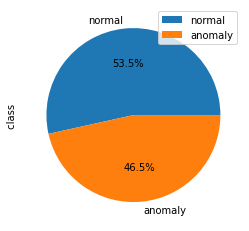

In [ ]:
df.iloc[:, -1].value_counts().plot.pie(autopct="%.1f%%", labels=df.iloc[:, -1].unique(), legend=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes.name == "object":
        df[i] = le.fit_transform(df[i])


In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


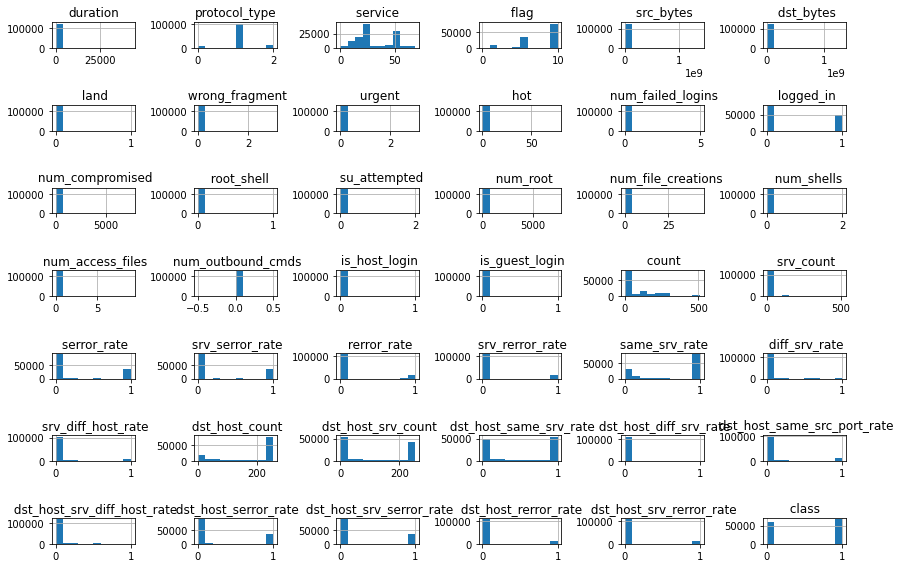

In [ ]:
df.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

/tmp/ipykernel_33013/3195219918.py:12: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


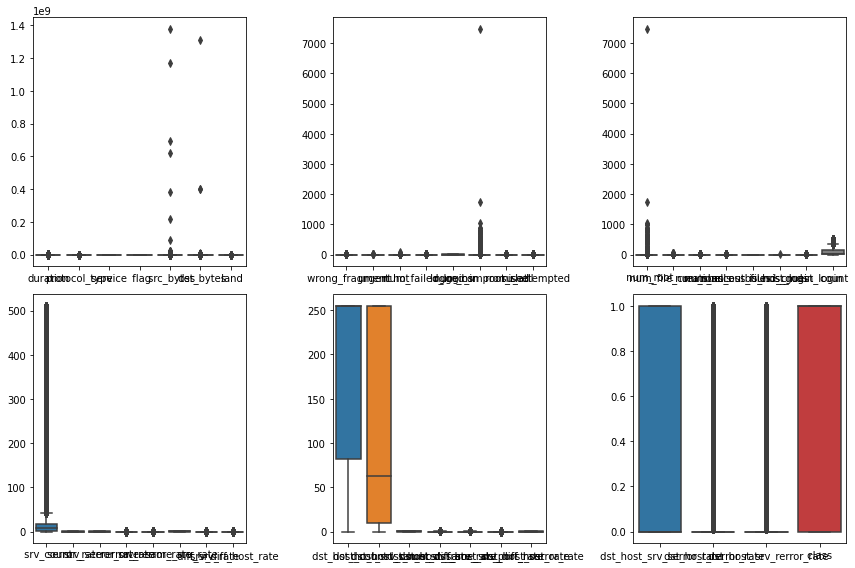

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8), layout="constrained")

sns.boxplot(data=df.iloc[:, :7], ax=ax[0][0])
sns.boxplot(data=df.iloc[:, 7:15], ax=ax[0][1])
sns.boxplot(data=df.iloc[:, 15:23], ax=ax[0][2])

sns.boxplot(data=df.iloc[:, 23:31], ax=ax[1][0])
sns.boxplot(data=df.iloc[:, 31:38], ax=ax[1][1])
sns.boxplot(data=df.iloc[:, 38:], ax=ax[1][2])

plt.tight_layout()
plt.show()

/tmp/ipykernel_33013/4289272554.py:11: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


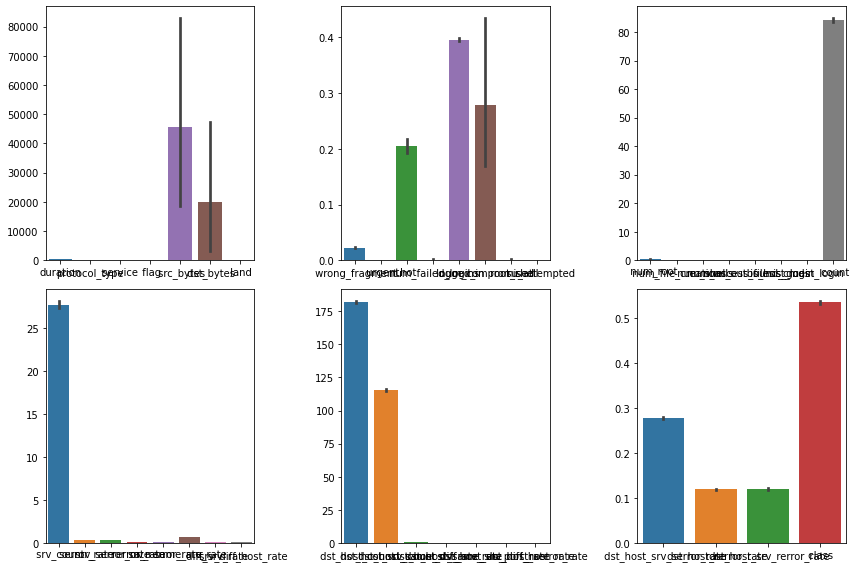

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8), layout="constrained")

sns.barplot(data=df.iloc[:, :7], ax=ax[0][0])
sns.barplot(data=df.iloc[:, 7:15], ax=ax[0][1])
sns.barplot(data=df.iloc[:, 15:23], ax=ax[0][2])

sns.barplot(data=df.iloc[:, 23:31], ax=ax[1][0])
sns.barplot(data=df.iloc[:, 31:38], ax=ax[1][1])
sns.barplot(data=df.iloc[:, 38:], ax=ax[1][2])

plt.tight_layout()
plt.show()

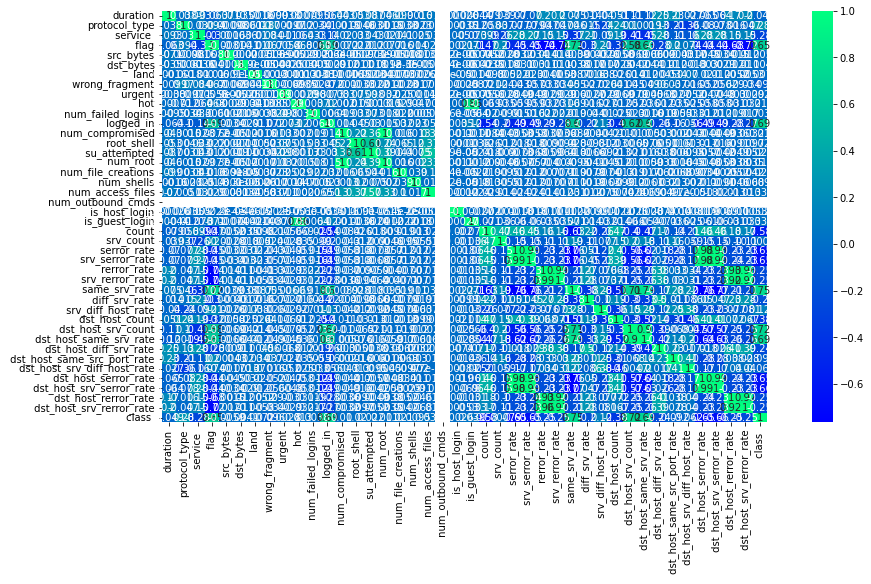

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8), layout="constrained")
sns.heatmap(df.corr(), annot=True, cmap="winter", ax=ax)
plt.show()

In [ ]:
df["num_outbound_cmds"].unique()

array([0])

In [ ]:
df.drop(columns=["num_outbound_cmds"], inplace=True)

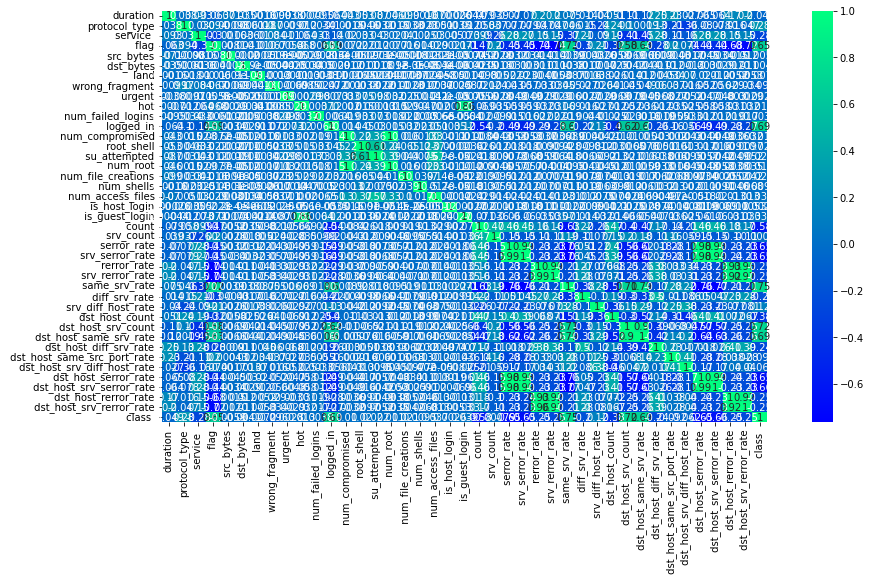

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8), layout="constrained")
sns.heatmap(df.corr(), annot=True, cmap="winter", ax=ax)
plt.show()

In [ ]:
df.shape

(125964, 41)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
df2 = pd.read_csv("KDDTrain+.csv")
for i in df2.columns:
    if df2[i].dtypes.name == "object":
        le.fit(df2[i])
        df[i] = le.inverse_transform(df[i])

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
df.to_csv("KDDTrain.csv")